# 1. Check Data

In [1]:
# import data
import pandas as pd
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 불러온 데이터를 코드로 출력하여 확인하기

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Count unique values
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
B37            1
E49            1
E40            1
B50            1
D10 D12        1
Name: Cabin, Length: 147, dtype: int64

In [4]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
# Count null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# apply condition
data.loc[(data.Survived==1) & (data.Age>30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


In [8]:
# apply()
age_mean = data.Age.mean()
data.Age.apply(lambda a: a-age_mean)

0      -7.699118
1       8.300882
2      -3.699118
3       5.300882
4       5.300882
         ...    
886    -2.699118
887   -10.699118
888          NaN
889    -3.699118
890     2.300882
Name: Age, Length: 891, dtype: float64

In [9]:
# groupby + apply
data.groupby('Embarked').apply(lambda df:df.loc[df.Age.idxmax()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Embarked,,,,,,,,,,,,
C,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
Q,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
S,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


In [10]:
# aggregation
data.groupby('Embarked').Age.agg([len, min, max, 'mean', sum])

,len,min,max,mean,sum
Embarked,,,,,
C,168.0,0.42,71.0,30.814769,4005.92
Q,77.0,2.00,70.5,28.089286,786.50
S,644.0,0.67,80.0,29.445397,16312.75


### 그래프로 데이터를 그려 확인하기

In [11]:
# import graph drawing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


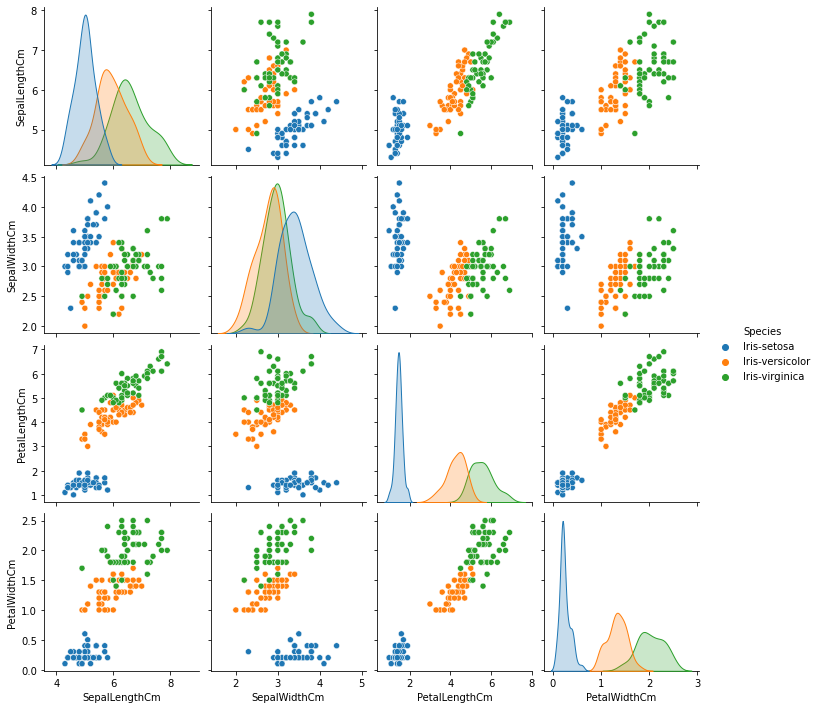

In [13]:
droped_iris = iris.drop(columns='Id')
sns.pairplot(data=droped_iris, hue='Species')

# 2. Preprocess

In [14]:
# import data

import pandas as pd
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### replace(), change specific value

In [15]:
data.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [16]:
data_tmp = data.copy()
data_tmp.Parch.replace(0, 1000)

0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
886    1000
887    1000
888       2
889    1000
890    1000
Name: Parch, Length: 891, dtype: int64

### Change dtype

In [17]:
# astype
data_tmp = data.copy()
print('데이터 타입: ', data_tmp.Age.dtype)
data_tmp.Age = data_tmp.Age.astype(str)
print('바뀐 데이터 타입: ', data_tmp.Age.dtype)

데이터 타입:  float64
바뀐 데이터 타입:  object


### Deal with null values

In [18]:
# Get null values for each columns
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Change null values in Cabin columns to 'unknown'
data_tmp = data.copy()
data_tmp.Cabin.fillna('unknown', inplace=True)
data_tmp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [45]:
# delete row that Age is null using subset
data_tmp.dropna(axis=0, subset=['Age']).isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

### Change non numeric values to numeric values using LabelEncoder

In [21]:
# encode data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_LE = data.copy()
data_LE['Sex'] = le.fit_transform(data.Sex)
data_LE['Ticket'] = le.fit_transform(data.Ticket)
data_LE['Cabin'] = le.fit_transform(data.Cabin)
data_LE['Embarked'] = le.fit_transform(data.Embarked)
data_LE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,60,0


### Apply scaler to scale values

In [22]:
# scaling

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
data_SC = data_LE.copy()
data_RC = data_LE.copy()

std_scale = StandardScaler()
rob_scale = RobustScaler()

data_SC.Embarked = std_scale.fit_transform(data_SC.Embarked.values.reshape(-1,1))
data_RC.Embarked = rob_scale.fit_transform(data_RC.Embarked.values.reshape(-1,1))

data_SC.Embarked.unique()

array([ 0.58111394, -1.93846038, -0.67867322,  1.8409011 ])

In [23]:
# Quantile transform
from sklearn.preprocessing import QuantileTransformer
data_QT = data_LE.copy()
qt_scale = QuantileTransformer()
data_QT.Embarked = qt_scale.fit_transform(data_QT.Embarked.values.reshape(-1, 1))
print(data_QT.Embarked.unique())
data_QT

[0.63595506 0.         0.23146067 1.        ]


C:\Users\tetae\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,0.635955
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,0.635955
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,0.635955
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,0.635955
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,147,0.635955
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,30,0.635955
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,147,0.635955
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,60,0.000000


### one hot encoding, pd.get_dummies

In [46]:
# Apply one hot encoding to all the values in data
pd.get_dummies(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Apply one hot encoding to certain columns
dummy_cols = ['Survived', 'Pclass', 'Age', 'Sex', 'Embarked']
data_dummy1 = pd.get_dummies(data[dummy_cols])
data_dummy1

,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,1,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,1,0,0,1
887,1,1,19.0,1,0,0,0,1
888,0,3,NaN,1,0,0,0,1
889,1,1,26.0,0,1,1,0,0


In [26]:
# Get columns that one hot encoding isn't applied
ori_cols = list(set(data.columns) - set(dummy_cols))
ori_cols

['Name', 'Cabin', 'PassengerId', 'SibSp', 'Fare', 'Ticket', 'Parch']

In [27]:
data_ori = pd.concat([data[ori_cols],data_dummy1], axis=1)
data_ori

,Name,Cabin,PassengerId,SibSp,Fare,Ticket,Parch,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",NaN,1,1,7.2500,A/5 21171,0,0,3,22.0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85,2,1,71.2833,PC 17599,0,1,1,38.0,1,0,1,0,0
2,"Heikkinen, Miss. Laina",NaN,3,0,7.9250,STON/O2. 3101282,0,1,3,26.0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123,4,1,53.1000,113803,0,1,1,35.0,1,0,0,0,1
4,"Allen, Mr. William Henry",NaN,5,0,8.0500,373450,0,0,3,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",NaN,887,0,13.0000,211536,0,0,2,27.0,0,1,0,0,1
887,"Graham, Miss. Margaret Edith",B42,888,0,30.0000,112053,0,1,1,19.0,1,0,0,0,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,889,1,23.4500,W./C. 6607,2,0,3,NaN,1,0,0,0,1
889,"Behr, Mr. Karl Howell",C148,890,0,30.0000,111369,0,1,1,26.0,0,1,1,0,0


# 3. Get optimum model

### Cheat sheet from scikit-learn

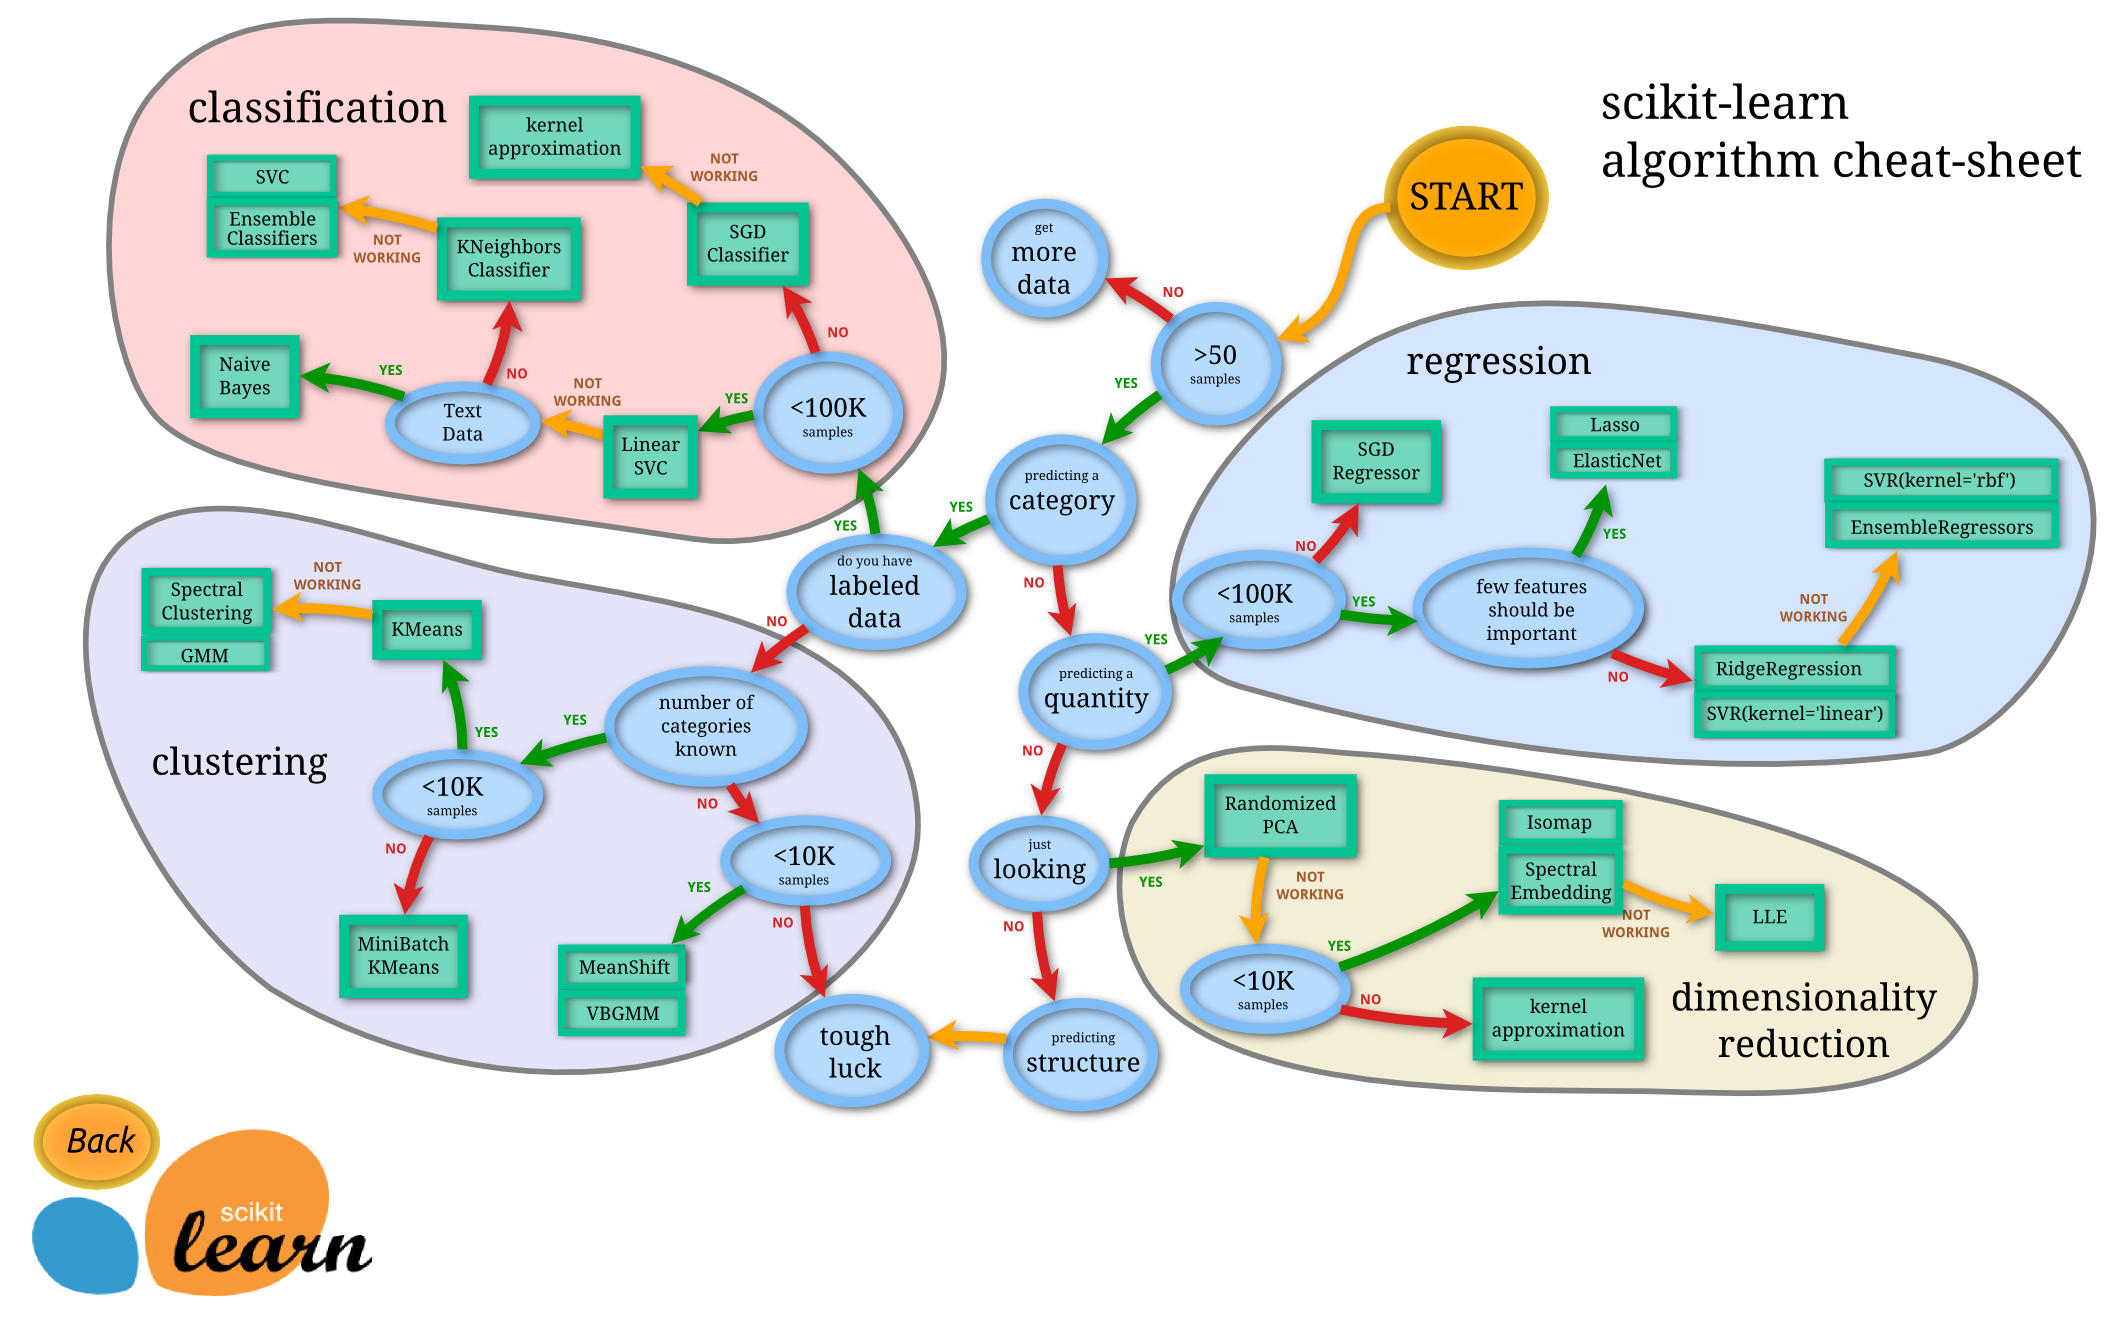

In [28]:
from IPython.display import Image
Image('sklearn_cheatsheet.png')

### GridSearchCV

In [29]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


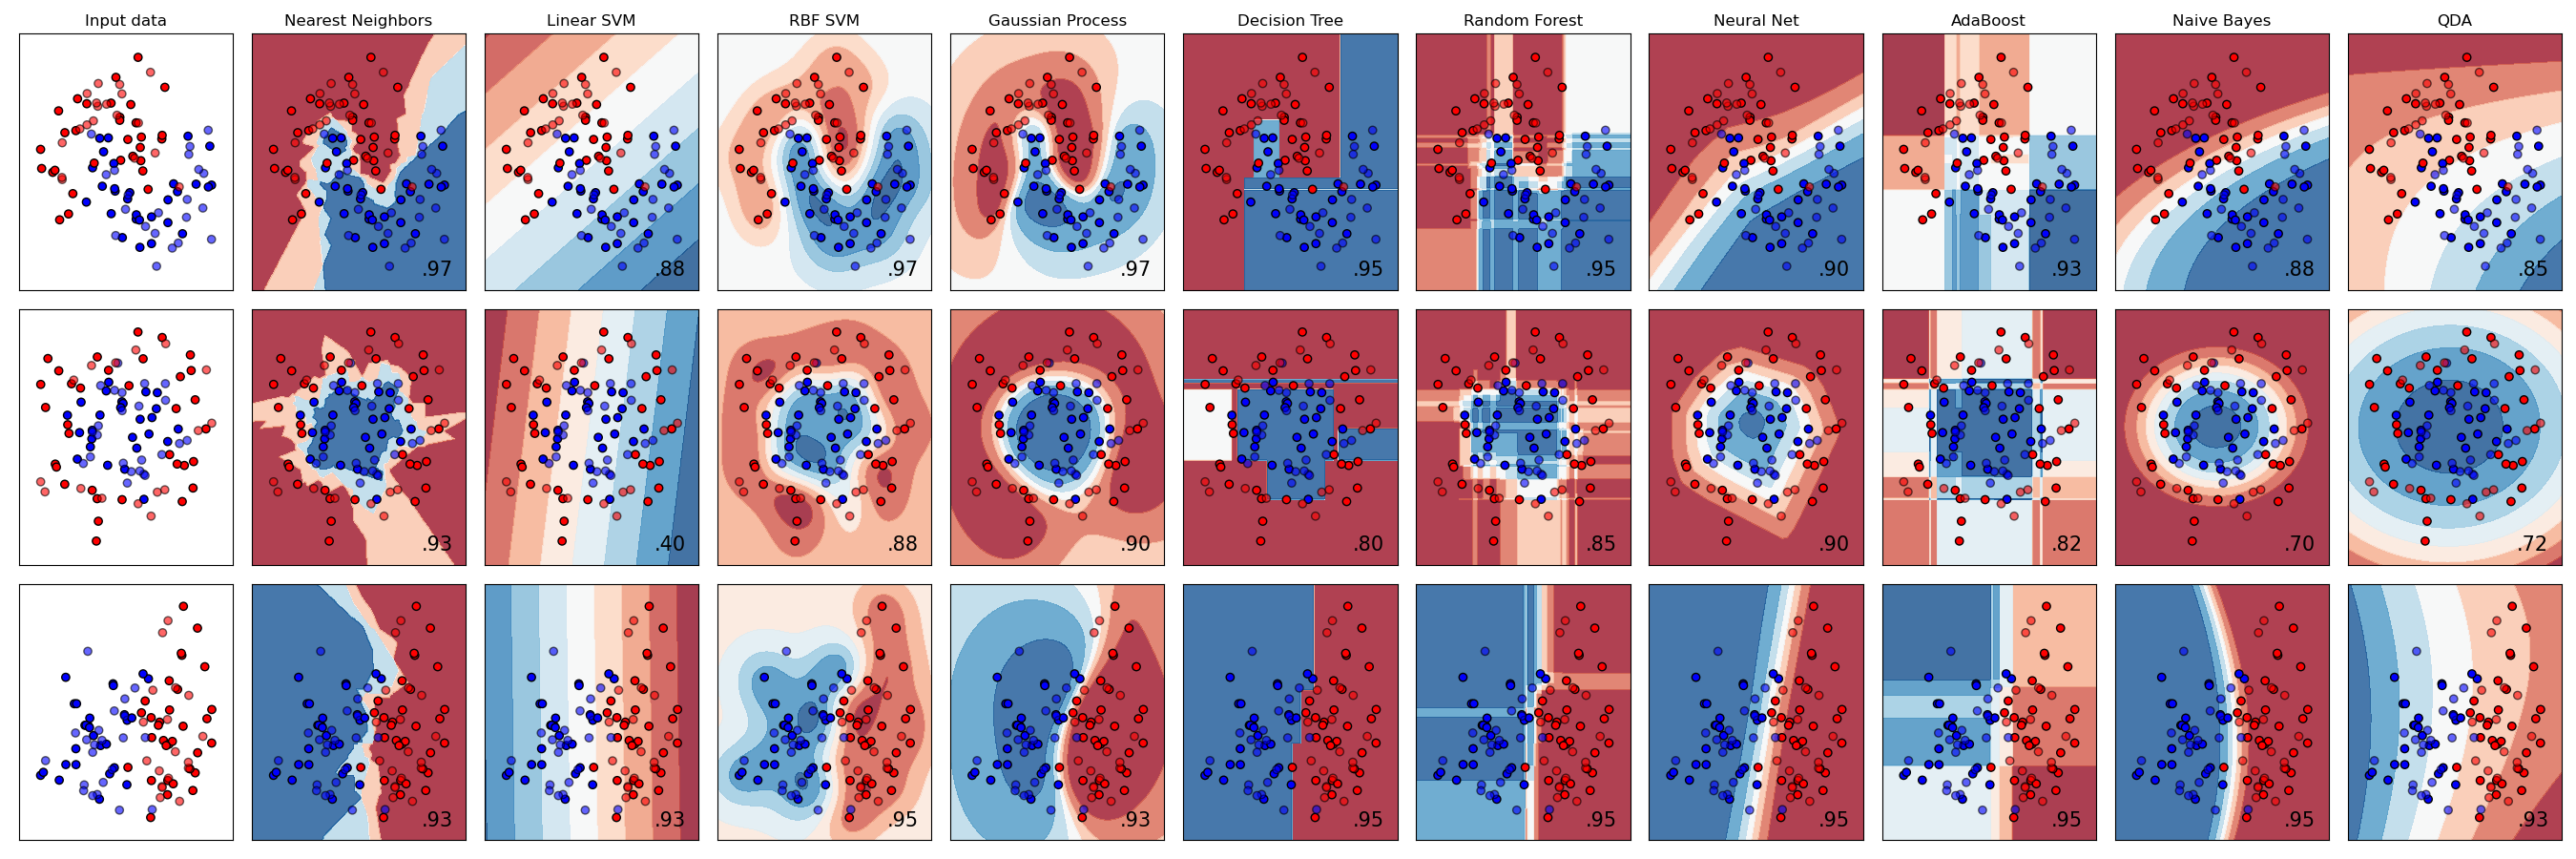

In [48]:
# model comparison from scikit-learn official website
Image('sphx_glr_plot_classifier_comparison_001.png')

In [49]:
# various models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
df_iris = df.set_index('Id')
X = df_iris.drop('Species', axis=1)
y = df_iris.Species

In [33]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score

C = [i*0.4 for i in range(4, 11)]
class_weight = [{'Iris-setosa':1, 'Iris-versicolor':1, 'Iris-virginica':1}]
mod = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': class_weight, 'C': C, 'penalty':['l1', 'l2']},
#     scoring={'precision':make_scorer(precision_score), 'recall_score':make_scorer(recall_score)},
#     refit='precision',
    cv=10 # train_test_splits
)

In [35]:
result = mod.fit(X, y)

pd.DataFrame(mod.cv_results_)

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tetae\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\tetae\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97333333        nan 0.97333333        nan 0.98
        nan 0.98              nan 0.98              nan 0.98
        nan 0.98      ]
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000400,0.000000,0.000000,1.6,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l1,"{'C': 1.6, 'class_weight': {'Iris-setosa': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.024703,0.002147,0.001300,0.000460,1.6,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l2,"{'C': 1.6, 'class_weight': {'Iris-setosa': 1, ...",1.0,0.933333,...,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,6
2,0.000498,0.000498,0.000000,0.000000,2.0,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l1,"{'C': 2.0, 'class_weight': {'Iris-setosa': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.026304,0.003075,0.001398,0.000488,2.0,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l2,"{'C': 2.0, 'class_weight': {'Iris-setosa': 1, ...",1.0,0.933333,...,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,6
4,0.000702,0.000460,0.000000,0.000000,2.4,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l1,"{'C': 2.4000000000000004, 'class_weight': {'Ir...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5,0.024697,0.002927,0.001400,0.000489,2.4,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l2,"{'C': 2.4000000000000004, 'class_weight': {'Ir...",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000403,0.000493,0.000000,0.000000,2.8,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l1,"{'C': 2.8000000000000003, 'class_weight': {'Ir...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,0.028504,0.002949,0.001697,0.000456,2.8,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l2,"{'C': 2.8000000000000003, 'class_weight': {'Ir...",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000497,0.000497,0.000000,0.000000,3.2,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l1,"{'C': 3.2, 'class_weight': {'Iris-setosa': 1, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
9,0.028302,0.003198,0.001398,0.000487,3.2,"{'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris...",l2,"{'C': 3.2, 'class_weight': {'Iris-setosa': 1, ...",1.0,0.933333,...,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


In [36]:
print(result.best_score_)
print(result.best_params_)
print(mod.best_estimator_)

0.9800000000000001
{'C': 2.4000000000000004, 'class_weight': {'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris-virginica': 1}, 'penalty': 'l2'}
LogisticRegression(C=2.4000000000000004,
                   class_weight={'Iris-setosa': 1, 'Iris-versicolor': 1,
                                 'Iris-virginica': 1},
                   max_iter=1000)


In [37]:
mod_best = mod.best_estimator_
mod_best.predict(X)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [38]:
??GridSearchCV

# 4. Organize results

### Change name of column and index

In [40]:
data_tmp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
data_tmp.rename(columns={'Parch':'Renamed_Parch', 'Age':'Renamed_Age'}, index={0:'zero', 1:'one'}).head()

,PassengerId,Survived,Pclass,Name,Sex,Renamed_Age,SibSp,Renamed_Parch,Ticket,Fare,Cabin,Embarked
zero,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
one,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


# get help

In [42]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
??LogisticRegression

In [44]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
